## Análisis Exploratorio Titanic Dataset

### Importar las librerias

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mostrar de manera interactiva las graficas 
%matplotlib inline 


### Cargando el dataset para trabajar con el 

In [10]:
df_train = pd.read_csv('titanic_train.csv') 

In [11]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Análisis Exploratorio

### 1- Verificar los datos perdidos `.isnull()`

In [12]:
 df_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df_train['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [14]:
df_train['Cabin'].isnull()

0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Cabin, Length: 891, dtype: bool

<AxesSubplot:>

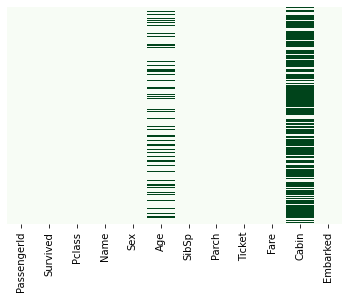

In [22]:
sns.heatmap(df_train.isnull(), yticklabels= False, cbar =False, cmap = 'Greens')

In [24]:
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
891-204

687

In [27]:
round(204/891*100, 1)

22.9

In [51]:
891-714

177

In [52]:
round(714/891*100, 1)

80.1

In [23]:
 df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Verificar los sobrevivientes y contar las observaciones

<AxesSubplot:xlabel='Survived', ylabel='count'>

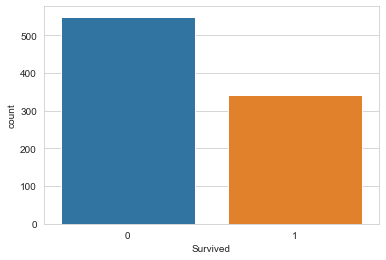

In [34]:
#Grafica que cuenta ocurrencias
sns.set_style('whitegrid')
sns.countplot('Survived', data = df_train )


In [32]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

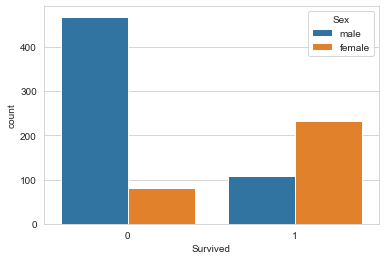

In [35]:
#Grafica que cuenta ocurrencias
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Sex', data = df_train )

In [48]:
survivor_men = df_train[df_train['Sex']== 'male']['Survived'].value_counts()
survivor_men

0    468
1    109
Name: Survived, dtype: int64

In [50]:
survivor_women = df_train[df_train['Sex']== 'female']['Survived'].value_counts()
survivor_women

1    233
0     81
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

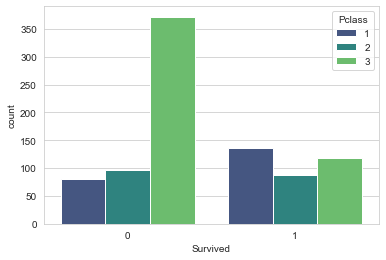

In [41]:
#Grafica que cuenta ocurrencias
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Pclass', 
              data = df_train, palette = 'viridis')

### Tarea: 
* Contar cuantos sobrevivientes hay por clase. 

* Se pueden contar sobrevivientes por sexo y clase?

### Verificaremos la distribución de edad en la data

<AxesSubplot:xlabel='Age', ylabel='Density'>

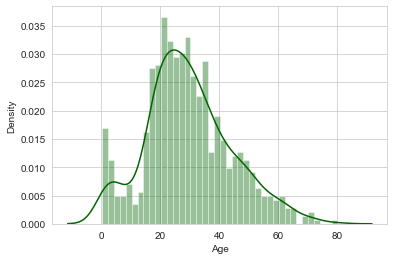

In [60]:
sns.distplot(train['Age'].dropna(), 
             color = 'darkgreen', bins = 40, 
             )

<AxesSubplot:>

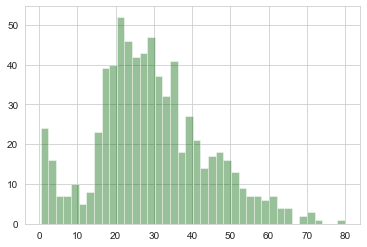

In [65]:
df_train['Age'].hist(color = 'darkgreen', bins = 40, alpha = 0.4)

### Familiares

<AxesSubplot:xlabel='SibSp', ylabel='count'>

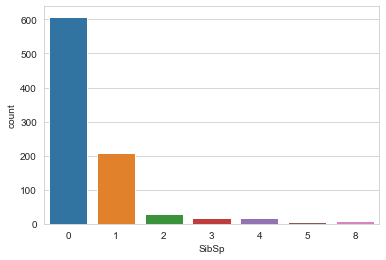

In [66]:
sns.countplot(x = 'SibSp', data = df_train )

### Tarifa - en histograma

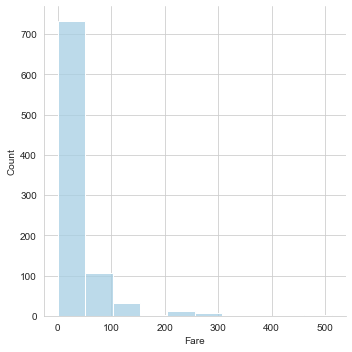

In [76]:
sns.set_palette("Paired")
sns.displot(train['Fare'].dropna(), bins = 10 )

## Interactividad `cufflinks`

In [78]:
pip install cufflinks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.7/81.7 kB 530.4 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done


  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67918 sha256=bf3f2ef9069ba28b7b76253f74189fb76225e2a6edb6bb4b0f95f93fb8e103f6
  Stored in directory: /Users/bltzkrg/Library/Caches/pip/wheels/29/b4/f8/2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks
DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [83]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(theme = 'pearl', offline= True)

In [84]:
df_train['Fare'].iplot(kind = 'hist')

### Limpiando la data para edades

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

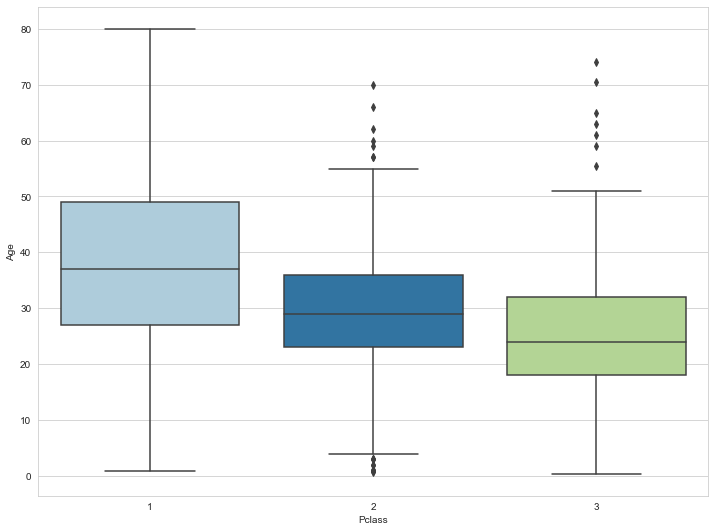

In [87]:
plt.figure(figsize= (12,9))
sns.boxplot(x = 'Pclass', y = 'Age', data= df_train)

### Obtner medias por Clase

In [90]:
pclass_mean = df_train.groupby('Pclass')['Age'].agg(['mean', 'count'])

In [94]:
pclass_mean.round(0)

,mean,count
Pclass,,
1,38.0,186
2,30.0,173
3,25.0,355


In [97]:
def subs_age(col):
    Age = col[0]
    Pclass= col[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

### Uso de la función Apply

In [98]:
df_train['Age']= df_train[['Age','Pclass']].apply(subs_age,axis=1)

<AxesSubplot:>

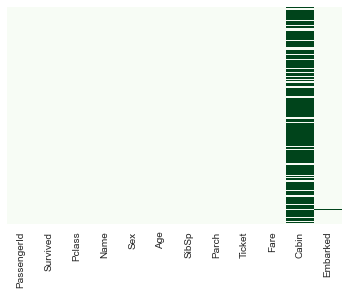

In [99]:
sns.heatmap(df_train.isnull(), yticklabels= False, cbar =False, cmap = 'Greens')

In [100]:
df_train.drop('Cabin', axis = 1, inplace=True)

<AxesSubplot:>

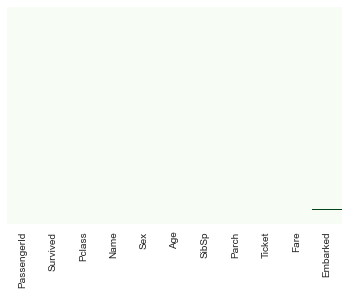

In [101]:
sns.heatmap(df_train.isnull(), yticklabels= False, cbar =False, cmap = 'Greens')

In [102]:
df_train.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,Q
